In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib
from Bio import Phylo
from Bio.Phylo.PhyloXML import Phylogeny, Clade

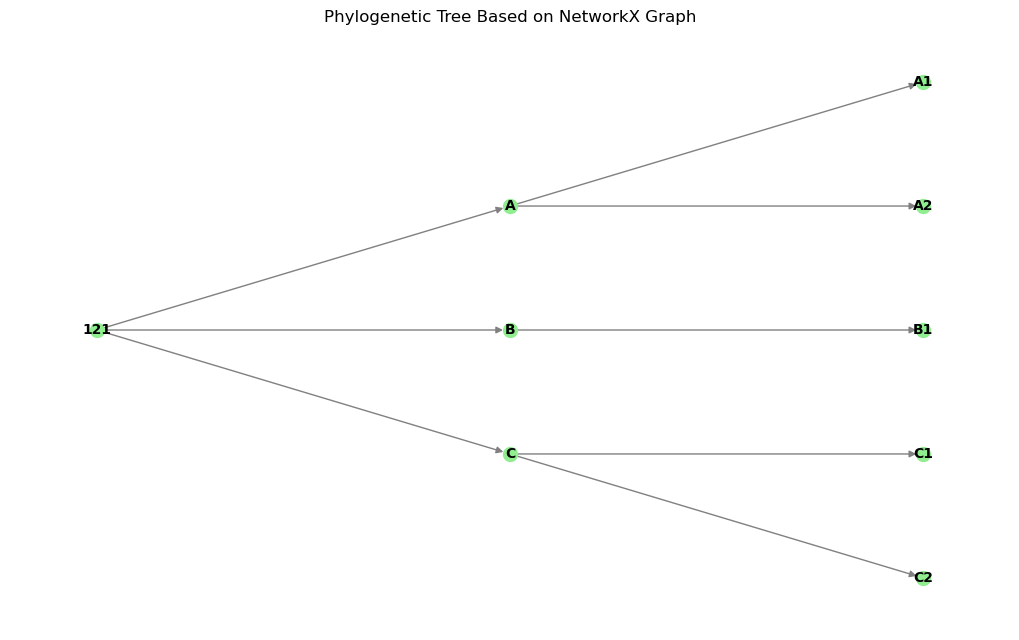

In [1]:
# Step 1: Construct a sample graph
G = nx.DiGraph()

# Define edges based on hypothetical phylogenetic data
edges = [
    (121, "A"), (121, "B"), (121, "C"),
    ("A", "A1"), ("A", "A2"), ("B", "B1"), ("C", "C1"), ("C", "C2")
]
G.add_edges_from(edges)

# Step 2: Assign a subset level to each node
# Root node (121) is at level 0, its children at level 1, and their children at level 2
for node in G.nodes():
    if node == 121:
        G.nodes[node]['subset'] = 0
    elif node in ["A", "B", "C"]:
        G.nodes[node]['subset'] = 1
    else:
        G.nodes[node]['subset'] = 2

# Step 3: Set node positions in a multipartite layout
pos = nx.multipartite_layout(G, subset_key="subset")

# Step 4: Draw the phylogenetic tree
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color="lightgreen", edge_color="grey", node_size=100, font_size=10, font_weight="bold")
plt.title("Phylogenetic Tree Based on NetworkX Graph")

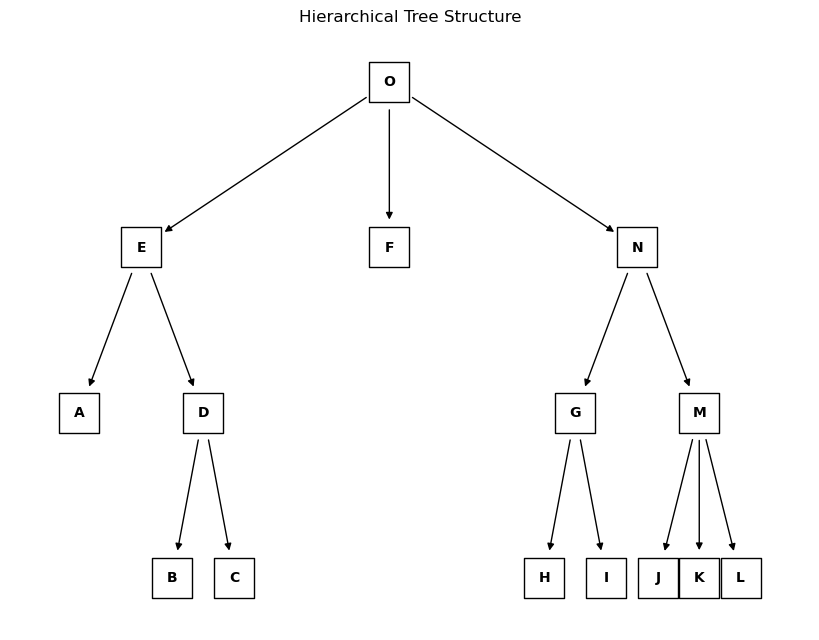

In [21]:
# Step 1: Define the tree structure as edges
edges = [
    ('O', 'E'), ('O', 'F'), ('O', 'N'),
    ('E', 'A'), ('E', 'D'), ('D', 'B'), ('D', 'C'),
    ('N', 'G'), ('N', 'M'), 
    ('G', 'H'), ('G', 'I'), ('M', 'J'), ('M', 'K'), ('M', 'L')
]

# Step 2: Create a directed graph and add edges
G = nx.DiGraph()
G.add_edges_from(edges)

# Step 3: Define the layout using a custom hierarchy positioning function
def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos

def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None, parsed=[]):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph):
        raise TypeError("The graph is not directed")
    if not nx.is_tree(G):
        raise TypeError("The graph is not a tree")
    if children:
        dx = width / len(children)
        nextx = xcenter - width / 2 - dx / 2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap, vert_loc=vert_loc - vert_gap, xcenter=nextx, pos=pos, parent=root, parsed=parsed)
    return pos

# Step 4: Generate positions for nodes in a hierarchical layout
pos = hierarchy_pos(G, root='O')

# Step 5: Draw the tree
plt.figure(figsize=(8, 6))
nx.draw(G, pos=pos, with_labels=True, node_size=800, node_shape='s', node_color="white", edgecolors="black", font_size=10, font_weight="bold")
plt.title("Hierarchical Tree Structure")

In [46]:
# Create a simple hierarchical graph (tree structure) with weights
G = nx.DiGraph()
G.add_weighted_edges_from([
    ('Root', 'A', 1.0), ('Root', 'B', 2.0),
    ('A', 'A1', 1), ('A', 'A2', 2),
    ('B', 'B1', 1), ('B', 'B2', 2)
])

def nx_to_clade(graph, node):
    """Recursively convert NetworkX nodes to Bio.Phylo Clade nodes."""
    clade = Clade(name=node)
    for child in graph.successors(node):  # Only directed edges from parent to child
        edge_data = graph.get_edge_data(node, child)
        weight = edge_data['weight'] if edge_data else 1.0
        child_clade = nx_to_clade(graph, child)
        child_clade.branch_length = weight
        clade.clades.append(child_clade)
    return clade

# Convert the NetworkX graph to a PhyloXML tree
root = 'Root'  # Define the root of your NetworkX graph
root_clade = nx_to_clade(G, root)
phylo_tree = Phylogeny.from_clade(root_clade, rooted=True)

# Save the PhyloXML tree to an XML file
with open("tree.xml", "w") as xml_file:
    Phylo.write([phylo_tree], xml_file, "phyloxml")

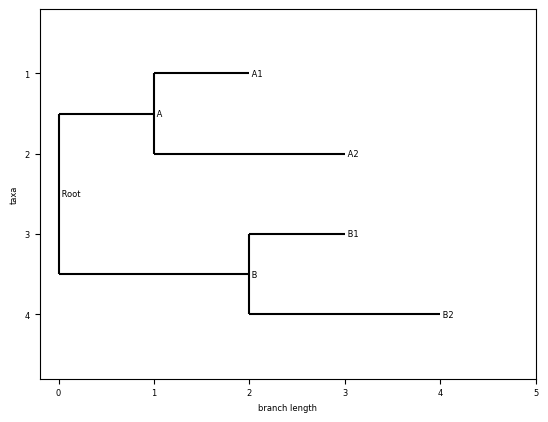

In [47]:
tree = Phylo.read("tree.xml", "phyloxml")
Phylo.draw(tree)

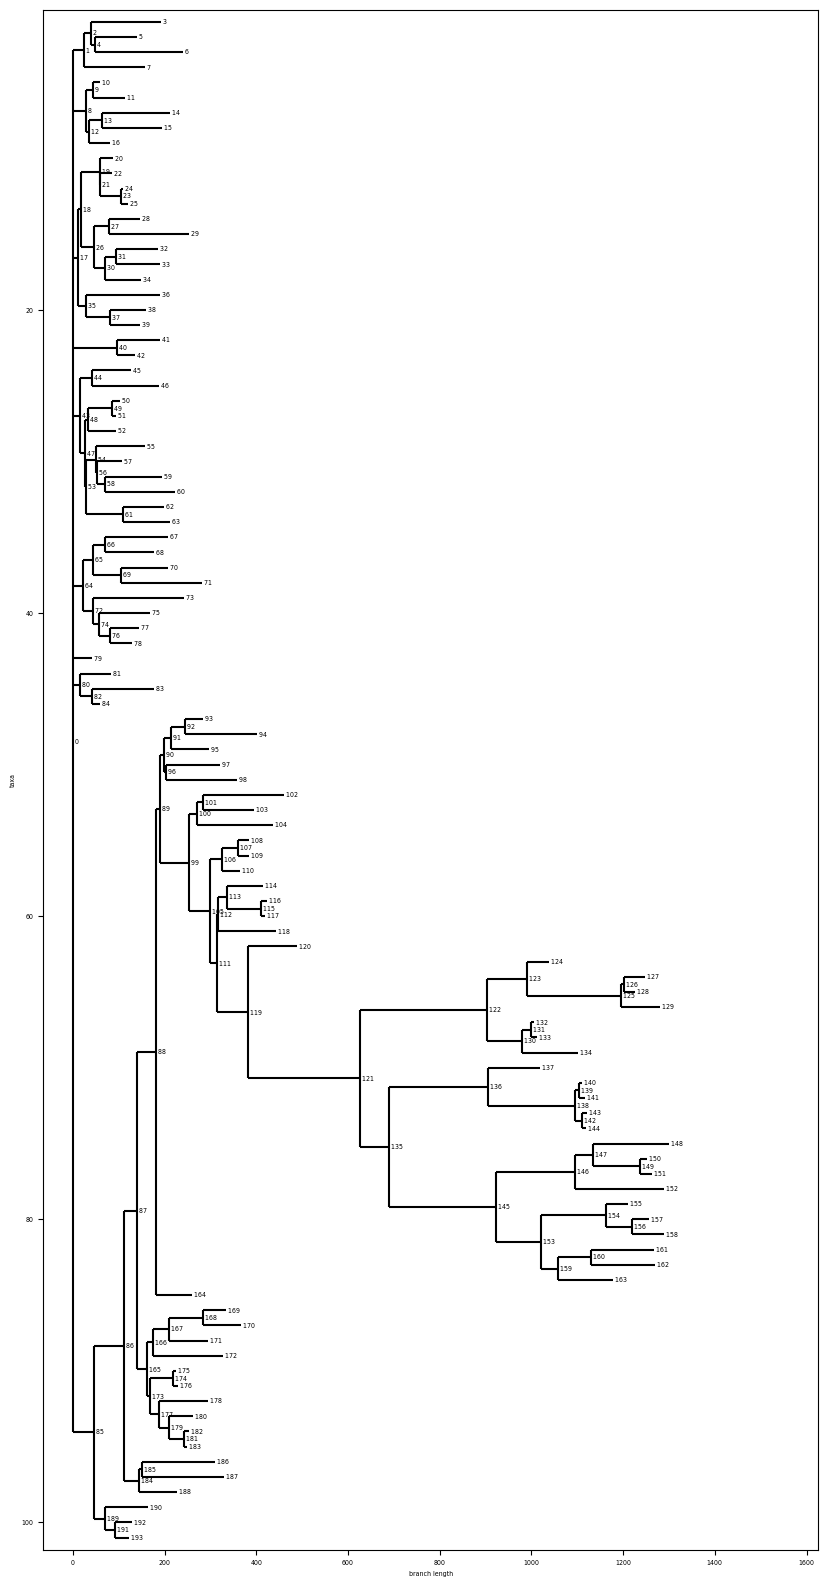

In [53]:
tree = Phylo.read("L5_morphology.xml", "phyloxml")
matplotlib.rc('font', size=4.5)
# set the size of the figure
fig = plt.figure(figsize=(10, 20), dpi=100)
# alternatively
# fig.set_size_inches(10, 20)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)

In [8]:
folder_path = '/G/results/simulation/20241106_1657/1'
section_synapse_df = pd.read_csv(folder_path + '/section_synapse_df.csv')

# only read basal distance_to_soma
basal_distance = section_synapse_df[(section_synapse_df['region'] == 'basal') & (section_synapse_df['type'] == 'A')
                                     ]['distance_to_soma'].values
# read tuft distance not equal to 0
tuft_distance = section_synapse_df[(section_synapse_df['distance_to_tuft'] != -1) & (section_synapse_df['type'] == 'A')
                                    ]['distance_to_tuft'].values

print(len(section_synapse_df))
print(len(basal_distance), len(tuft_distance))
print(max(basal_distance), max(tuft_distance))

28922
9882 7692
293.694875610882 673.6713257143365


9754 7737
Basal: CDF crosses 3300 at distance 94.9915489457412
Basal: CDF crosses 6600 at distance 147.3624162340025
Tuft: CDF crosses 2500 at distance 346.0913488964072
Tuft: CDF crosses 5000 at distance 505.7334743421608
9470 7688
Basal: CDF crosses 3300 at distance 99.90543260506846
Basal: CDF crosses 6600 at distance 151.94505597337542
Tuft: CDF crosses 2500 at distance 346.1877820188299
Tuft: CDF crosses 5000 at distance 503.8180226685455
8903 7698
Basal: CDF crosses 3300 at distance 108.29714791501422
Basal: CDF crosses 6600 at distance 162.13699671141438
Tuft: CDF crosses 2500 at distance 343.24417805780274
Tuft: CDF crosses 5000 at distance 504.80519383429606


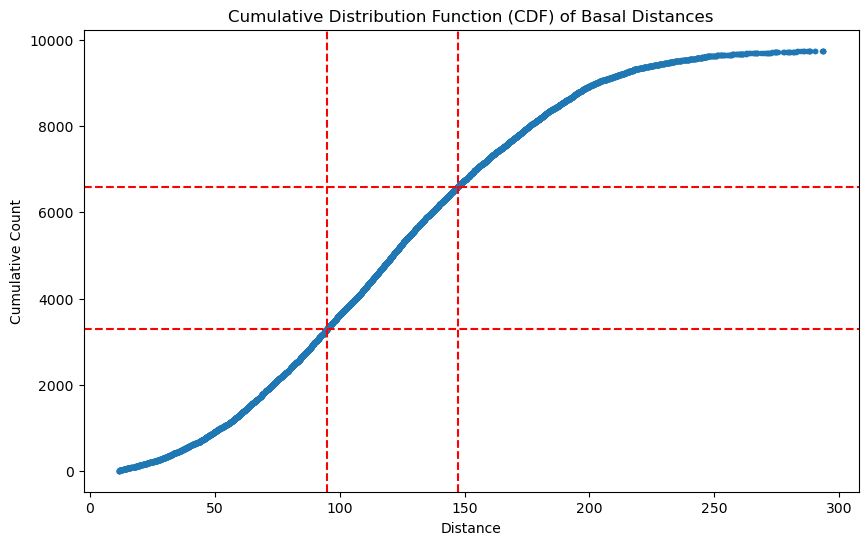

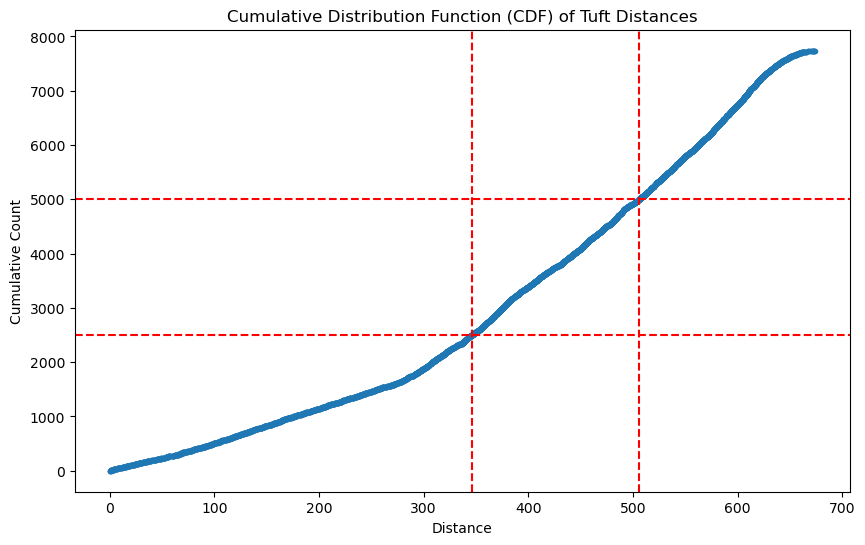

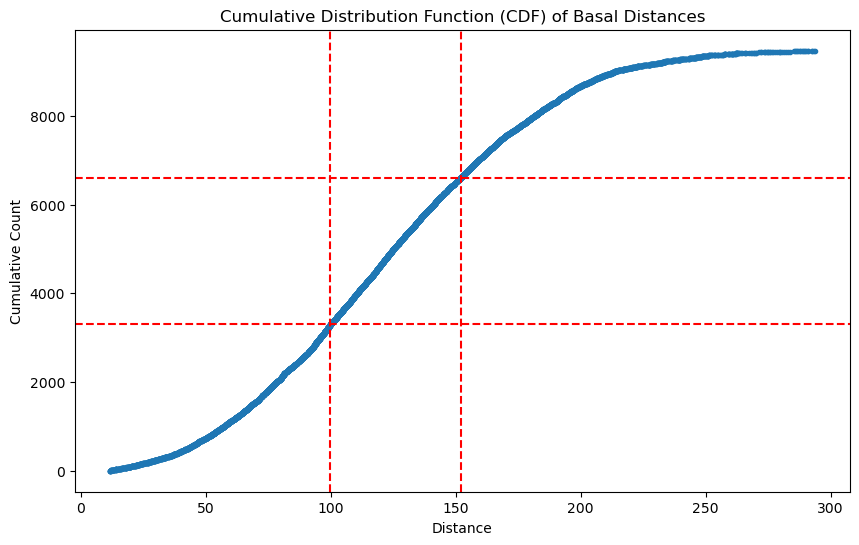

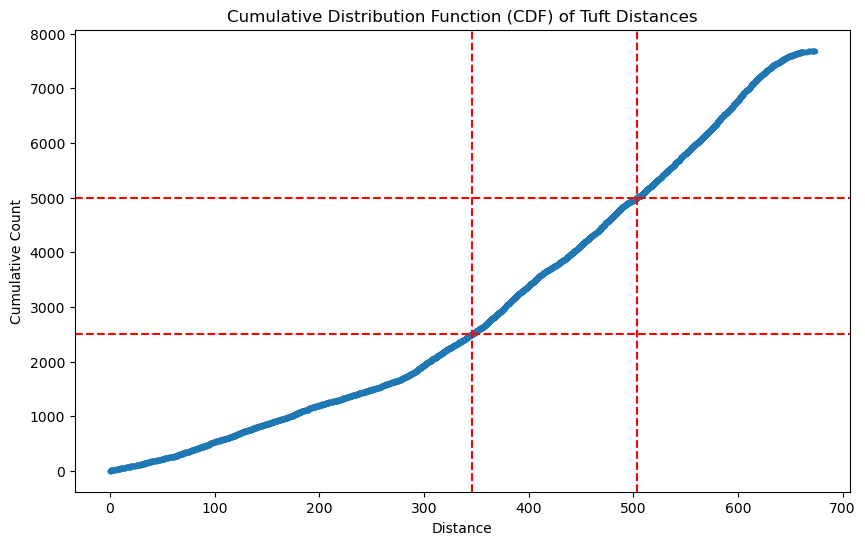

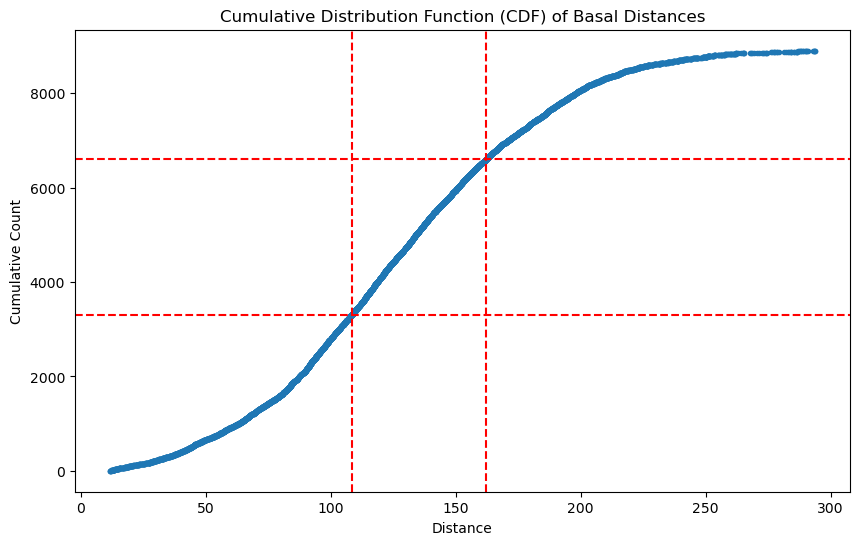

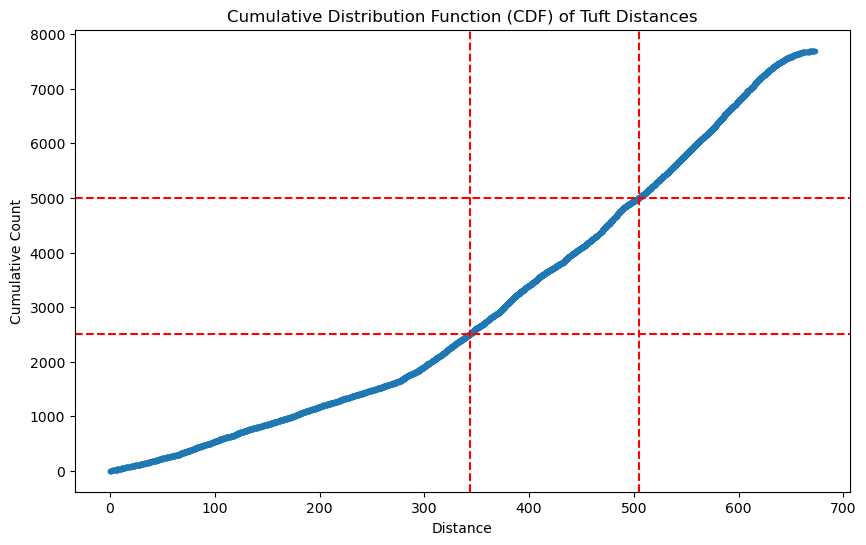

In [25]:
def visualize_dist_cdf(folder_path):
    section_synapse_df = pd.read_csv(folder_path + '/section_synapse_df.csv')

    # only read basal distance_to_soma
    basal_distance = section_synapse_df[(section_synapse_df['region'] == 'basal') & (section_synapse_df['type'] == 'A')
                                        ]['distance_to_soma'].values

    # read tuft distance not equal to 0
    tuft_distance = section_synapse_df[(section_synapse_df['distance_to_tuft'] != -1) & (section_synapse_df['type'] == 'A')
                                        ]['distance_to_tuft'].values

    print(len(basal_distance), len(tuft_distance))

    # Step 2: Sort the distances
    sorted_basal_distances = np.sort(basal_distance)
    sorted_tuft_distances = np.sort(tuft_distance)

    # Step 3: Calculate the cumulative count
    cumulative_count_basal = np.arange(1, len(sorted_basal_distances) + 1)
    cumulative_count_tuft = np.arange(1, len(sorted_tuft_distances) + 1)

    # Step 4: Plot the CDF with cumulative count
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_basal_distances, cumulative_count_basal, marker='.', linestyle='none')
    plt.xlabel('Distance')
    plt.ylabel('Cumulative Count')
    plt.title('Cumulative Distribution Function (CDF) of Basal Distances')

    # Draw red dashed lines at specified cumulative counts
    thresholds = [3300 + i * 3300 for i in range(2)]
    for threshold in thresholds:
        if threshold <= len(cumulative_count_basal):
            corresponding_distance = sorted_basal_distances[threshold - 1]
            plt.axhline(y=threshold, color='red', linestyle='--')
            plt.axvline(x=corresponding_distance, color='red', linestyle='--')
            print(f"Basal: CDF crosses {threshold} at distance {corresponding_distance}")

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_tuft_distances, cumulative_count_tuft, marker='.', linestyle='none')
    plt.xlabel('Distance')
    plt.ylabel('Cumulative Count')
    plt.title('Cumulative Distribution Function (CDF) of Tuft Distances')

    # Draw red dashed lines at specified cumulative counts
    thresholds  = [2500 + i * 2500 for i in range(2)]
    for threshold in thresholds:
        if threshold <= len(cumulative_count_tuft):
            corresponding_distance = sorted_tuft_distances[threshold - 1]
            plt.axhline(y=threshold, color='red', linestyle='--')
            plt.axvline(x=corresponding_distance, color='red', linestyle='--')
            print(f"Tuft: CDF crosses {threshold} at distance {corresponding_distance}")

# visualize_dist_cdf('/G/results/simulation/20241105_1035/1')
# visualize_dist_cdf('/G/results/simulation/20241105_1055/1')

visualize_dist_cdf('/G/results/simulation/basal_range0_clus_invitro/38/1')
visualize_dist_cdf('/G/results/simulation/basal_range0_clus_invitro/39/1')
visualize_dist_cdf('/G/results/simulation/basal_range0_clus_invitro/40/1')

In [20]:
from concurrent.futures import ProcessPoolExecutor
import time

def dummy_task(worker_id):
    time.sleep(1)  # Simulate some work
    return worker_id

if __name__ == "__main__":
    max_workers = 4200  # Test with more workers than your CPU count
    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        results = list(executor.map(dummy_task, range(max_workers)))
    print("Test completed successfully!")


KeyboardInterrupt: 

In [10]:
import numpy as np
for _ in range(5):
    numbers = np.repeat(np.arange(5), 3)
    np.random.shuffle(numbers)
    indices = [[num] for num in numbers]
    print(indices)


[[1], [1], [3], [0], [1], [2], [2], [0], [4], [0], [4], [3], [4], [3], [2]]
[[3], [1], [1], [4], [1], [4], [4], [0], [2], [3], [0], [2], [0], [3], [2]]
[[1], [3], [0], [4], [3], [2], [2], [4], [4], [0], [2], [1], [0], [1], [3]]
[[4], [2], [3], [1], [1], [3], [1], [0], [3], [2], [4], [2], [0], [4], [0]]
[[4], [3], [1], [0], [1], [3], [1], [4], [3], [4], [2], [2], [2], [0], [0]]


In [21]:
import numpy as np
import time
seed = int(time.time())
rnd = np.random.RandomState(seed)

num_clusters = 20
num_conn_per_preunit = 8    
print(rnd.choice(num_clusters, num_conn_per_preunit, replace=True)) 

[19 16  7 13 19  8 16  1]
